In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as mt
from sklearn.ensemble import RandomForestClassifier

In [2]:
######################################################################################
###### Task 1a) Load data from Labelled_Multiclass.csv in pandas dataframe ###########
######          preprocess data set and visualize it in tabular form #################
######################################################################################
############# CODE ALREADY GIVEN BELOW #############

#read dataset
data = pd.read_csv('Labelled_Multiclass.csv')

# fill Nan values with median value for each feature
data = data.fillna(data.median(numeric_only=True)) 

columns = data.columns.values

#drop first 8 columns
data = data.drop(columns=columns[:8])

#take label then drop label column
y = data['label'].to_numpy()
data = data.drop(columns=['label'])
X = data.values

# Find the number of distinct labels and make a list of distinct labels for later use
n_label = len(set(y))
labels = list(set(y))

#show data
data

,acmEngine,esN-2,sesN-2,txMaxAN-2,txminAN-2,rxmaxAN-2,rxminAN-2,txMaxBN-2,txminBN-2,rxmaxBN-2,...,rxmaxAN,rxminAN,txMaxBN,txminBN,rxmaxBN,rxminBN,lowthr,ptx,RxNominal,Thr_min
0,1,0.0,0.0,18.0,18.0,-49.0,-49.0,18.0,18.0,-50.0,...,-52.0,-97.0,22.0,18.0,-52.0,-96.0,-85.0,23.0,-44,-86
1,1,0.0,0.0,18.0,18.0,-49.0,-53.0,18.0,18.0,-50.0,...,-50.0,-96.0,22.0,18.0,-52.0,-93.0,-85.0,23.0,-44,-86
2,1,0.0,0.0,18.0,18.0,-45.0,-47.0,18.0,18.0,-47.0,...,-52.0,-91.0,22.0,18.0,-53.0,-89.0,-82.5,23.0,-52,-84
3,1,0.0,0.0,18.0,18.0,-45.0,-52.0,18.0,18.0,-47.0,...,-80.0,-95.0,22.0,22.0,-78.0,-94.0,-82.5,23.0,-52,-84
4,1,0.0,0.0,18.0,18.0,-45.0,-46.0,18.0,18.0,-47.0,...,-45.0,-93.0,22.0,18.0,-47.0,-90.0,-82.5,23.0,-52,-84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,1,0.0,0.0,18.0,18.0,-58.0,-60.0,18.0,18.0,-52.0,...,-60.0,-97.0,22.0,18.0,-54.0,-96.0,-85.5,28.0,-49,-87
2509,0,0.0,0.0,18.0,18.0,-40.0,-41.0,18.0,18.0,-39.0,...,-48.0,-87.0,18.0,18.0,-49.0,-83.0,-64.5,18.0,-37,-84
2510,0,0.0,0.0,18.0,18.0,-39.0,-40.0,18.0,18.0,-38.0,...,-48.0,-86.0,18.0,18.0,-47.0,-82.0,-64.5,18.0,-37,-84
2511,1,0.0,0.0,17.0,17.0,-55.0,-68.0,17.0,17.0,-55.0,...,-47.0,-71.0,17.0,17.0,-48.0,-93.0,-82.5,23.0,-56,-84


In [3]:
#############################################################################################
###### Task 1b) Split data set, train model and check performance ###########################
#############################################################################################
############# CODE ALREADY GIVEN BELOW #############

#define test percetange
test_percentage = 0.2

#split data
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=test_percentage,random_state=36, stratify=y, shuffle=True)
X_train = X_train.values
X_test = X_test.values

#train model
rf = RandomForestClassifier(n_estimators=290, criterion="entropy", class_weight='balanced', random_state=42)
rf = rf.fit(X_train, y_train)

#predict class of failure. y_predicted is an array of all predictions while y_test is the ground truth
y_predicted = rf.predict(X_test)

np.set_printoptions(precision=2)
print("Accuracy: ", mt.accuracy_score(y_test, y_predicted))
print("Precision: ", mt.precision_score(y_test, y_predicted, labels=labels, average=None))
print("Recall: ", mt.recall_score(y_test, y_predicted, labels=labels, average=None))
print("F1-score: ",mt.recall_score(y_test, y_predicted, labels=labels, average=None))
    

Accuracy:  0.9463220675944334
Precision:  [0.86 0.94 0.82 0.83 0.97 0.99]
Recall:  [0.86 0.94 0.9  0.79 0.97 0.99]
F1-score:  [0.86 0.94 0.9  0.79 0.97 0.99]


In [4]:
import shap 
import shap.plots

D:\anaconda3\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
D:\anaconda3\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, num_passes=2):
D:\anac

In [5]:
######################################################################################
###### Task 2a) Initialize the SHAP explainer and calculate/show SHAP values #########
######################################################################################
############# CODE ALREADY GIVEN BELOW #############

#set number of shap points to consider with SHAP, we can consider the whole dataset 
shappoints = 2500

#create and initialize explainer, we use TreeExplainer and pass the rf classifier as an argument
explainer_shap = shap.TreeExplainer(rf)

#Calculating the SHAP values by using shap_values method. It takes training data as an argument
shap_values = explainer_shap.shap_values(data[:shappoints])

shap_values

[array([[ 0.03,  0.01,  0.  , ...,  0.02, -0.  ,  0.01],
        [ 0.03,  0.01,  0.  , ...,  0.02, -0.01,  0.  ],
        [ 0.03,  0.01,  0.  , ...,  0.02,  0.  ,  0.  ],
        ...,
        [-0.01,  0.  , -0.  , ...,  0.01, -0.01, -0.  ],
        [-0.01,  0.  , -0.  , ...,  0.01, -0.01, -0.  ],
        [-0.01,  0.  , -0.  , ...,  0.01, -0.01, -0.  ]]),
 array([[ 8.22e-03, -7.66e-04, -3.95e-04, ..., -8.70e-04,  5.00e-03,
          1.86e-03],
        [ 7.94e-03, -1.38e-03, -5.82e-04, ...,  6.91e-04,  6.72e-03,
          4.53e-03],
        [ 4.73e-03, -1.24e-03, -4.01e-04, ..., -1.47e-03, -1.68e-04,
         -1.47e-03],
        ...,
        [-6.99e-03, -1.80e-03, -1.19e-05, ..., -1.29e-03, -5.01e-03,
         -5.27e-03],
        [-6.98e-03, -1.81e-03, -1.41e-05, ..., -1.25e-03, -5.02e-03,
         -5.26e-03],
        [-7.00e-03, -1.81e-03, -1.41e-05, ..., -1.25e-03, -5.00e-03,
         -5.24e-03]]),
 array([[-2.45e-03, -1.01e-03, -5.12e-04, ..., -5.27e-03, -1.38e-03,
         -1.04e-03]

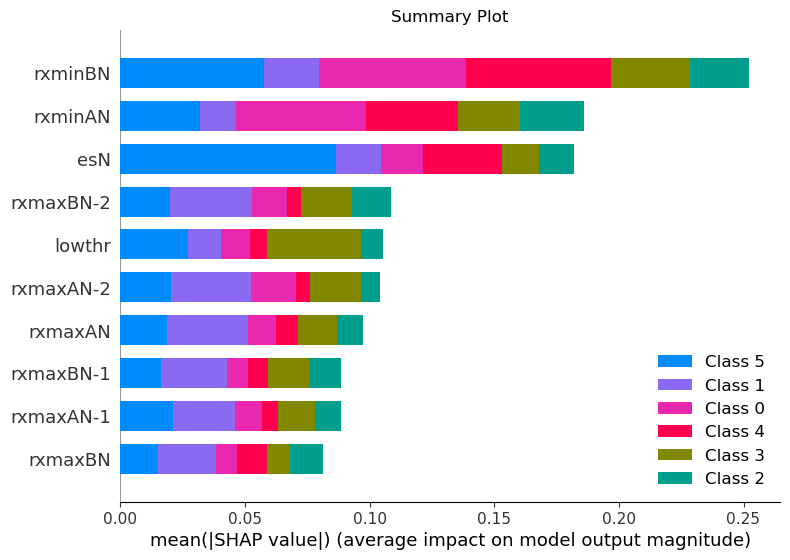

In [6]:
#######################################################################################
###### Task 2b) Plot SHAP Globe Summary Plot ##########################################
#######################################################################################
############# CODE ALREADY GIVEN BELOW #############

#Plot the overall summary plot (for all classes) using summary_plot method
#We passed the method 4 arguments: 1) calculated SHAP values, 2) feature names, 3) show = False to not directly
#plot the figure and 4) max_display to specify the number of features to display in figure
shap.summary_plot(shap_values, feature_names=list(data.columns), show = False, max_display=10)
plt.title("Summary Plot")
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


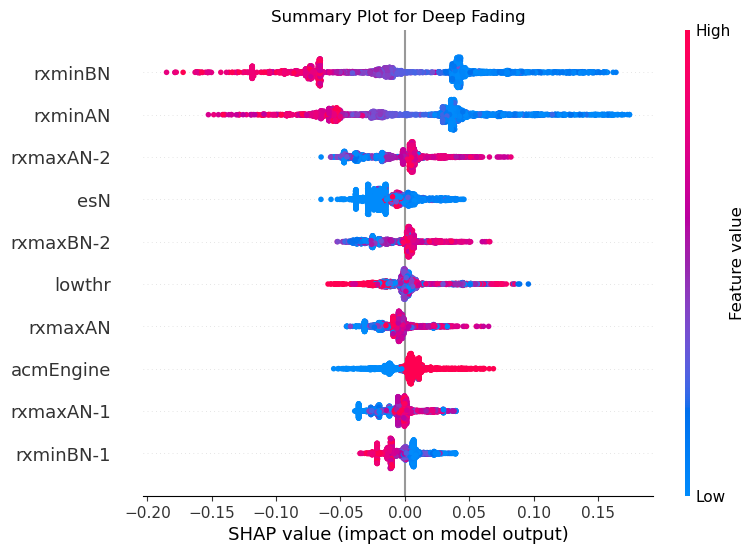

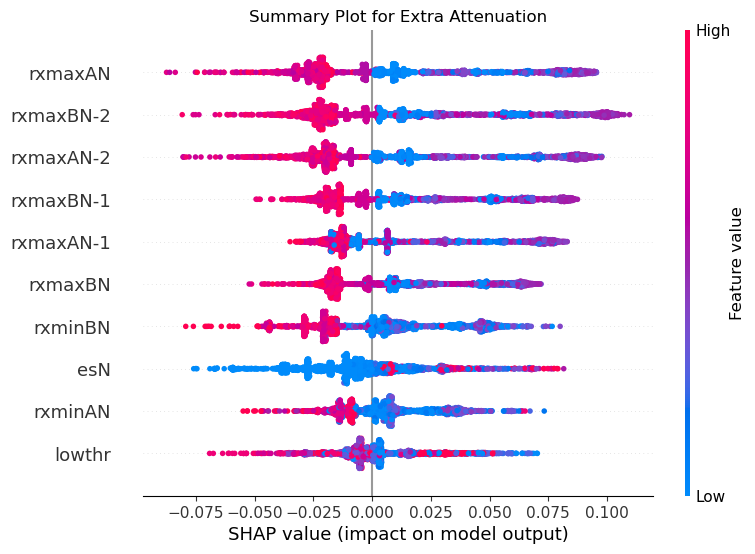

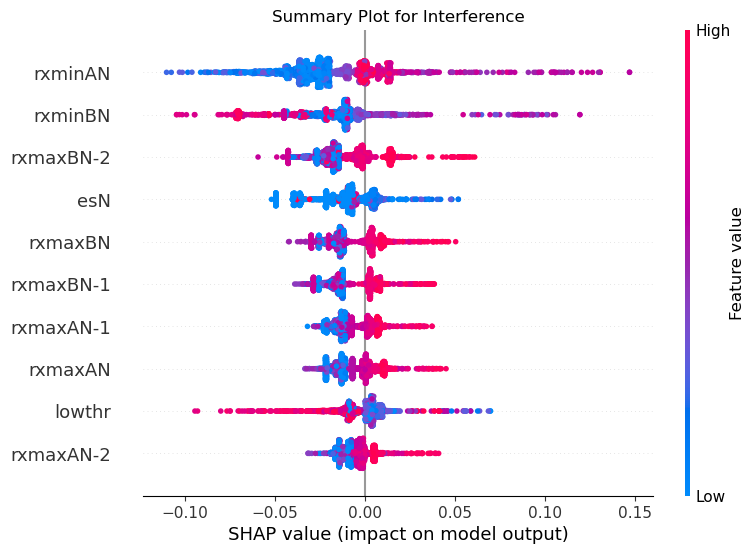

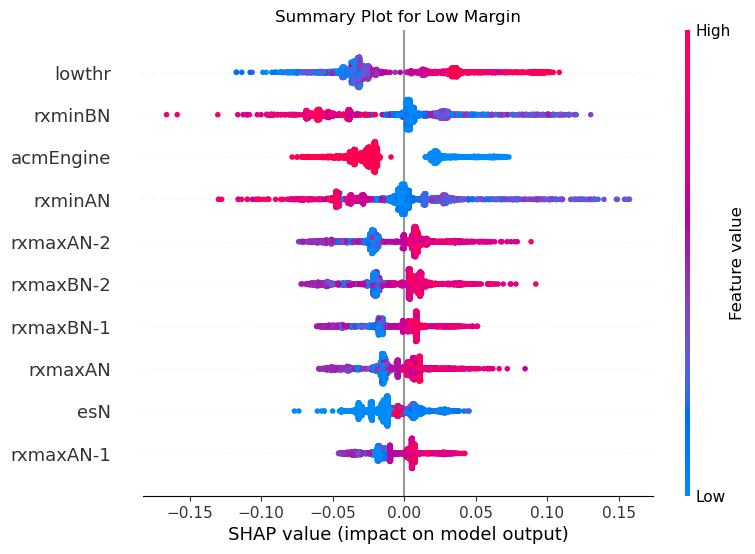

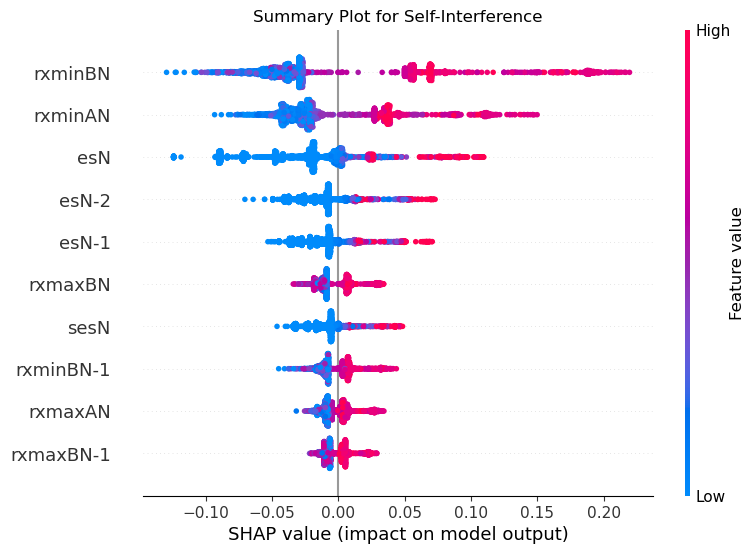

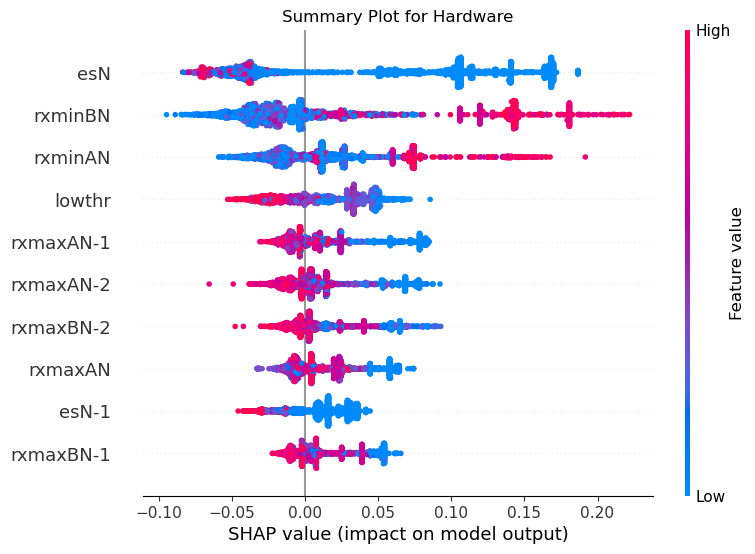

In [7]:
#####################################################################
###### Task 2c) Plot SHAP Summary Plot for each of the classes ######
#####################################################################
############# CODE ALREADY GIVEN BELOW #############

class_name = ['Deep Fading', 'Extra Attenuation', 'Interference', 'Low Margin', 'Self-Interference', 'Hardware']

#Iterate over labels (classes) and plot SHAP's summary plot of each label using shap.summary_plot method
#method takes shap_values of the class, data set (from this SHAP gets features' values) and features names 
#in addition to the number of features to display
#we use show = False so the figure is not directly plotted so we can add a unique title to it in a next step
for class_ind in range(n_label):
    shap.summary_plot(shap_values[class_ind], features=data[:shappoints], feature_names=list(data.columns), 
                      show = False, max_display=10)

    title = 'Summary Plot for ' + str(class_name[class_ind])
    plt.title(title)
    plt.show()


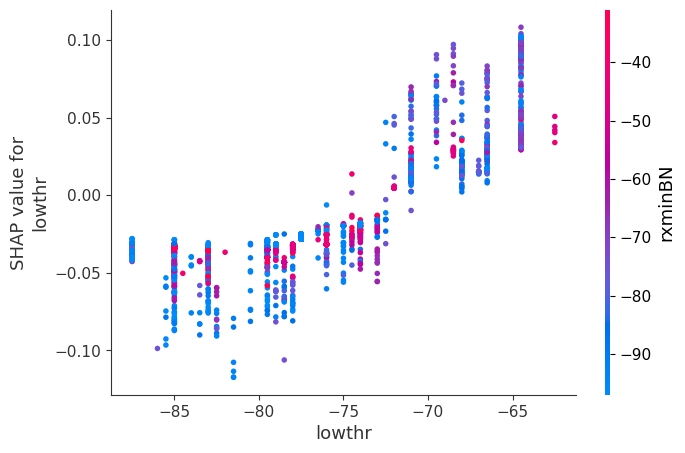

In [8]:
#####################################################################
###### Task 2c) Plot SHAP Dependance plot for lowthr and rxminBN features in Low margin class ######
#####################################################################
############# CODE ALREADY GIVEN BELOW #############

# plot SHAP values for lowthr feature in Low margin class (index 3) and use color to code value of rxminBN feature
shap.dependence_plot('lowthr', shap_values[3], features=data[:shappoints], feature_names=list(data.columns), 
                     interaction_index = 'rxminBN')
plt.show()